# References
## Eccles et al. (1961)
* When there was a smooth decline in the frequency of the repetitive response evoked by a maximal antidromic volley, progressive weakening of the synaptic excitation caused a shortening of the response and a more rapid decline of the frequency.

## Uchiyama et al. (2003a)
*  RC firing patterns evoked by single-pulse submaximal or maximal activation of the medial gastrocnemius nerve is a long burst of spikes, starting at an instantaneous maximum firing rate of approximately 1600 pps and then decaying to lower rates.
* Synaptic swellings are indications of the strength of an $\alpha$ motoneuron's synaptic inputs to other spinal neurons. The proportions used are those reported by Cullheim and Kellerth (1978), in which FF number is ca. 1.8 the FR number and ca. 2.2 the S number.

# Parameters adjusted

# Considerations
* Both papers used medial gastrocnemius nerves, but in Eccles et al. (1961) I could not find an exact equivalence of what is shown in Uchiyama et al. (2003a). However, I will use the latter, since the global behavior is depicted more clearly there.

In [1]:
import sys
sys.path.insert(0, '../../..')
import time

import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from Configuration import Configuration
from MotorUnitPoolOpt import MotorUnitPool
from InterneuronPoolOpt import InterneuronPool
from SynapsesFactory import SynapsesFactory

In [93]:
def simulator(numberS, numberFR, numberFF, numberRC, Parametrization, MNRCdecay, RCMNdecay, posMN, posRC, stimulusAmplitudes, FFConductanceStrength):

    conf = Configuration('../../confuchiyama.rmto')
    # Number of cells
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-S')[0][0]
    conf.confArray['f1'][idx] = numberS
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FR')[0][0]
    conf.confArray['f1'][idx] = numberFR
    idx = np.where(conf.confArray['f0']=='MUnumber_MG-FF')[0][0]
    conf.confArray['f1'][idx] = numberFF
    idx = np.where(conf.confArray['f0']=='Number_RC_ext')[0][0]
    conf.confArray['f1'][idx] = numberRC
    
    # Duration of simulation
    conf.simDuration_ms = 70
    
    if Parametrization == 'old':
        from SynapsesFactory import SynapsesFactory
        # Parameters from java
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.3
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.24
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.17
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.3

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 64.77885
        conf.confArray['f2'][idx] = 64.77885
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 285
        conf.confArray['f2'][idx] = 285
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 200
        conf.confArray['f2'][idx] = 200
        
    elif Parametrization == 'new':
        from SynapsesFactory import SynapsesFactory
        # Parameters from Python
        ## Threshold (makes a rheobase of 1.25-3.75 nA)
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 5
        conf.confArray['f2'][idx] = 15
        
        ## Connectivity
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 4
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 6

        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.44
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 0.15

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 25
        conf.confArray['f2'][idx] = 25
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 242
        conf.confArray['f2'][idx] = 242
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 760
        conf.confArray['f2'][idx] = 760
        
    elif Parametrization == 'final':
        from SynapsesFactoryRenshaw import SynapsesFactory
        ## Conductances
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.130
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.119
        idx = np.where(conf.confArray['f0']=='gmax:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 0.081
        idx = np.where(conf.confArray['f0']=='gmax:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = FFConductanceStrength/2.2
        idx = np.where(conf.confArray['f0']=='gmax:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = FFConductanceStrength/1.8
        idx = np.where(conf.confArray['f0']=='gmax:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = FFConductanceStrength
        
        # Threshold
        idx = np.where(conf.confArray['f0']=='threshold:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 18.9089
        conf.confArray['f2'][idx] = 18.9089

        ## Morphology
        idx = np.where(conf.confArray['f0']=='d@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 27
        conf.confArray['f2'][idx] = 27
        idx = np.where(conf.confArray['f0']=='l@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 218.2168
        conf.confArray['f2'][idx] = 218.2168
        idx = np.where(conf.confArray['f0']=='res@soma:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 7000
        conf.confArray['f2'][idx] = 7000

        # Ks
        idx = np.where(conf.confArray['f0']=='gmax_Kf:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 3300
        idx = np.where(conf.confArray['f0']=='gmax_Ks:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 2300000
        idx = np.where(conf.confArray['f0']=='beta_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.02
        idx = np.where(conf.confArray['f0']=='alpha_q:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.004
        idx = np.where(conf.confArray['f0']=='alpha_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 6
        idx = np.where(conf.confArray['f0']=='beta_n:RC_ext-@soma')[0][0]
        conf.confArray['f1'][idx] = 0.5
        
        ## Connectivity, set to ensure neurons are connected properly
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = 100
        idx = np.where(conf.confArray['f0']=='Con:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = 100
        
        # Decay factors
        idx = np.where(conf.confArray['f0']=='dec:MG-S>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FR>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:MG-FF>RC_ext-@soma|excitatory')[0][0]
        conf.confArray['f1'][idx] = MNRCdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-S@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FR@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        idx = np.where(conf.confArray['f0']=='dec:RC_ext->MG-FF@dendrite|inhibitory')[0][0]
        conf.confArray['f1'][idx] = RCMNdecay
        
        # Columnar length
        idx = np.where(conf.confArray['f0']=='position:MG-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posMN
        idx = np.where(conf.confArray['f0']=='position:RC_ext-')[0][0]
        conf.confArray['f1'][idx] = 0
        conf.confArray['f2'][idx] = posRC
        
    # Antidromic stimulus
    idx = np.where(conf.confArray['f0']=='stimStart_PTN')[0][0]
    conf.confArray['f1'][idx] = 1
    idx = np.where(conf.confArray['f0']=='stimStop_PTN')[0][0]
    conf.confArray['f1'][idx] = 50
    idx = np.where(conf.confArray['f0']=='stimFrequency_PTN')[0][0]
    conf.confArray['f1'][idx] = 1
    idx = np.where(conf.confArray['f0']=='stimPulseDuration_PTN')[0][0]
    conf.confArray['f1'][idx] = 1
    idx = np.where(conf.confArray['f0']=='stimModulationStart_PTN')[0][0]
    conf.confArray['f1'][idx] = 0
    idx = np.where(conf.confArray['f0']=='stimModulationStop_PTN')[0][0]
    conf.confArray['f1'][idx] = 0
    # Dynamics of MN-RC synapse
    idx = np.where(conf.confArray['f0']=='dyn:MG-S>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FR>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None
    idx = np.where(conf.confArray['f0']=='dyn:MG-FF>RC_ext-@soma|excitatory')[0][0]
    conf.confArray['f1'][idx] = None

    pools = dict()
    pools[0] = MotorUnitPool(conf, 'MG')
    pools[1] = InterneuronPool(conf, 'RC', 'ext')

    Syn = SynapsesFactory(conf, pools)

    t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

    availableRCs = range(pools[1].Nnumber)
    recordedRC = np.random.choice(availableRCs)
    # Empty array with proper dimensionality for appending
    instantaneousFiring = [np.empty((0,1), dtype=float)]*(len(stimulusAmplitudes))
    
    for k, stimulusAmplitude in enumerate(stimulusAmplitudes):
        idx = np.where(conf.confArray['f0']=='stimIntensity_PTN')[0][0]
        conf.confArray['f1'][idx] = stimulusAmplitude
        for i in xrange(pools[0].MUnumber):
            pools[0].unit[i].createStimulus()

        RCmemb = np.zeros_like(t, dtype = 'd')
        for i in xrange(0, len(t)):
            pools[0].atualizeMotorUnitPool(t[i]) # MN pool
#             pools[2].atualizePool(t[i]) # RC synaptic Noise
            pools[1].atualizeInterneuronPool(t[i]) # RC pool
            RCmemb[i] = pools[1].v_mV[recordedRC]
        
        plt.figure()
        plt.plot(t, RCmemb)
        plt.show()

        pools[0].listSpikes()
        pools[1].listSpikes()

        RCSpikeInstants = pools[1].poolSomaSpikes[pools[1].poolSomaSpikes[:,1]==recordedRC, 0]
        print RCSpikeInstants
#         import pdb; pdb.set_trace()
        for i in range(len(RCSpikeInstants)-1):
            instantaneousFiring[k] = np.append(instantaneousFiring[k], 
                                               [1000/(RCSpikeInstants[i+1]-RCSpikeInstants[i])])
            
        for k in xrange(0, len(pools)-1): # - 1 to exclude synaptic noise
            pools[k].reset()

    return instantaneousFiring

In [94]:
nS = 75
nFR = 75
nFF = 150
nRC = 300
params = 'final'
declinefactor_MN = 1/6.0
declinefactor_RC = 3.5/3
MNposition = 7
RCposition = 7
stimAmp = range(30,110,20)
gmaxFF = 0.3

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37834 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built


<IPython.core.display.Javascript object>


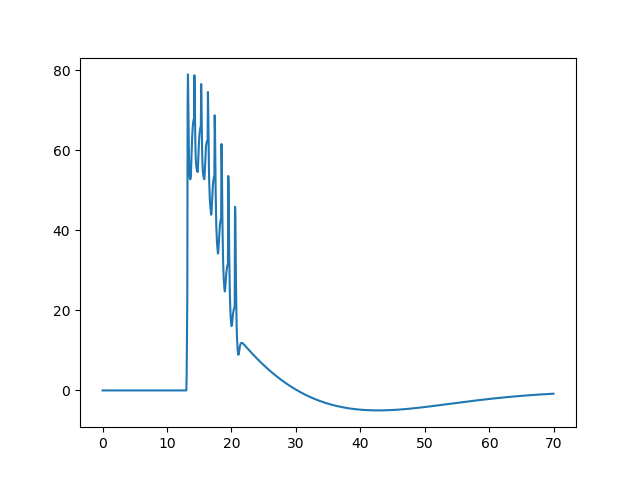

[13.15 14.2  15.25 16.3  17.35 18.4  19.45 20.5 ]


<IPython.core.display.Javascript object>


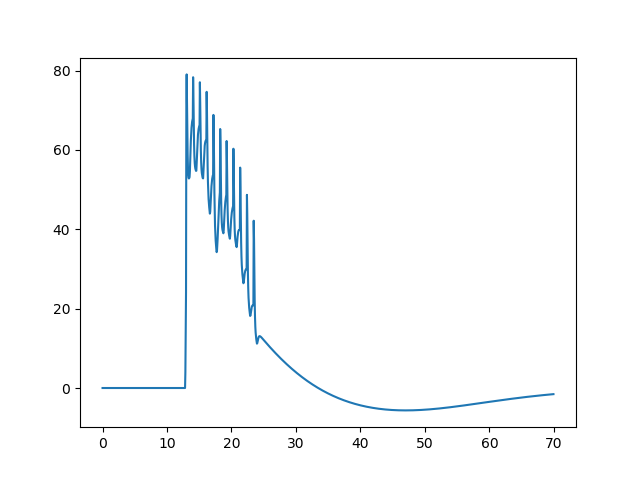

[12.95 14.   15.05 16.1  17.15 18.2  19.2  20.25 21.3  22.35 23.4 ]


<IPython.core.display.Javascript object>


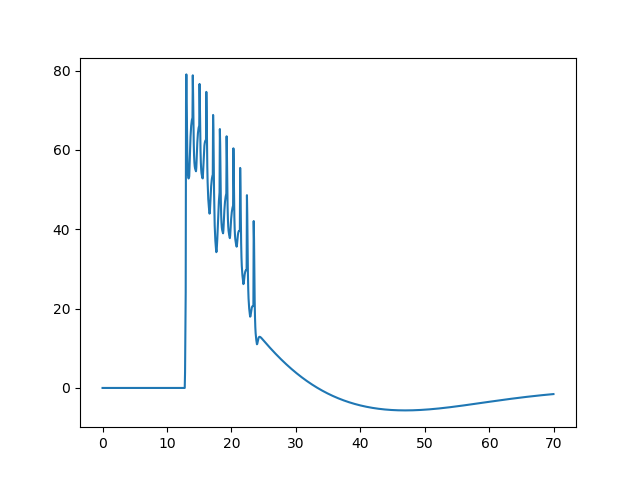

[12.9  13.95 15.   16.05 17.1  18.15 19.2  20.25 21.3  22.35 23.4 ]


<IPython.core.display.Javascript object>


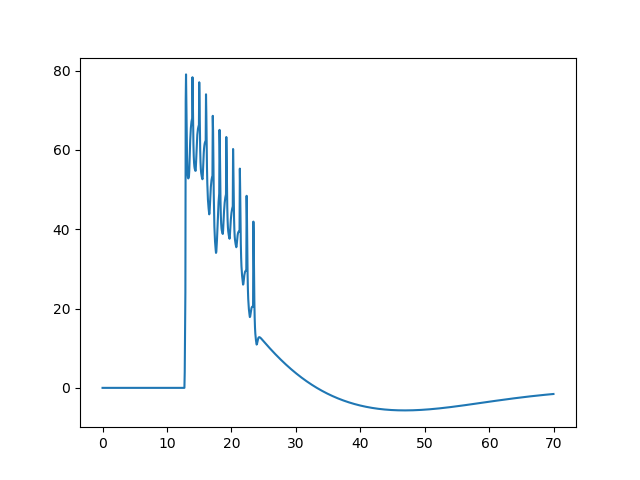

[12.85 13.9  14.95 16.   17.05 18.1  19.15 20.2  21.25 22.3  23.35]
291.470748901 seconds


<IPython.core.display.Javascript object>


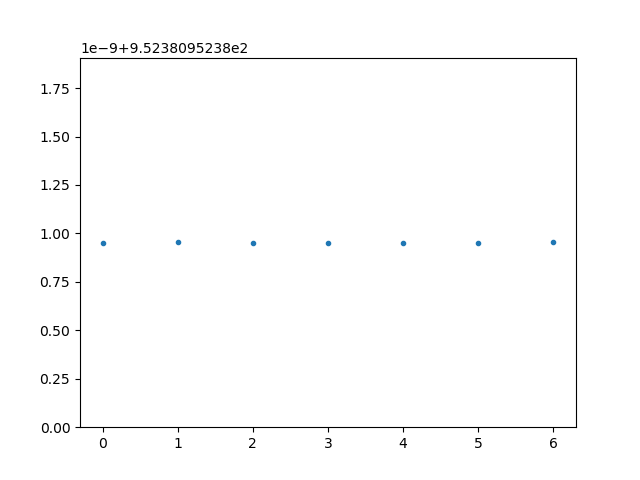

<IPython.core.display.Javascript object>


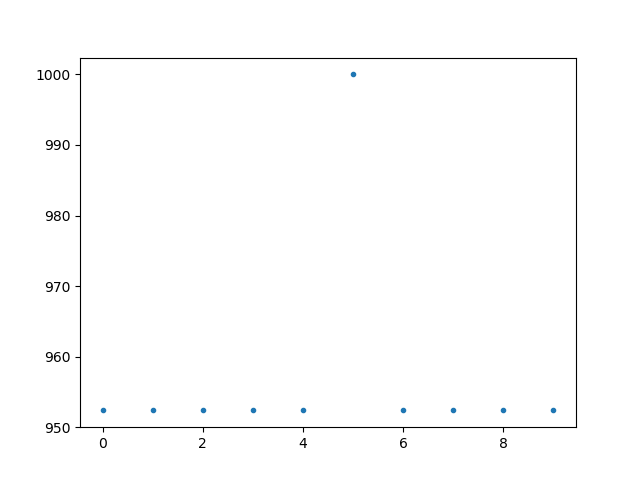

<IPython.core.display.Javascript object>


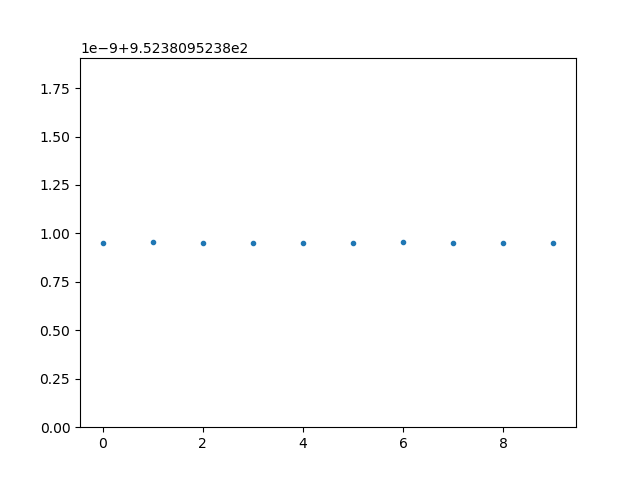

<IPython.core.display.Javascript object>


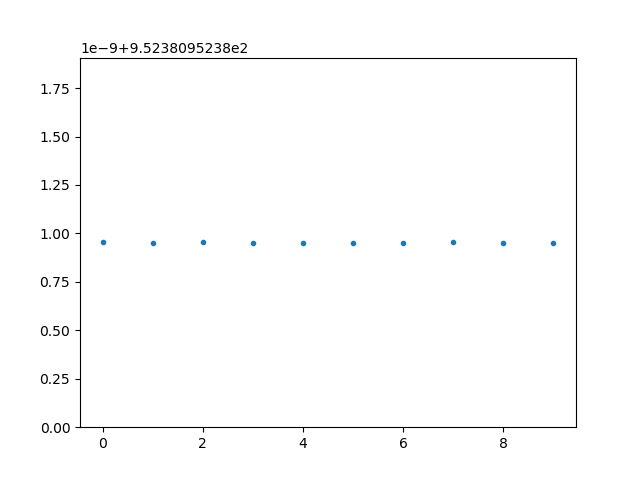

In [95]:
tic = time.time()
instFR = simulator(nS, nFR, nFF, nRC, params, declinefactor_MN, declinefactor_RC, MNposition, RCposition, stimAmp, gmaxFF)
toc = time.time()
print str(toc - tic) + ' seconds'
for i in instFR:
    plt.figure()
    plt.plot(i, '.')
    plt.show()